In [747]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [748]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go

In [749]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df.data_somministrazione = pd.to_datetime(df.data_somministrazione)

In [750]:
df.sort_values('data_somministrazione', inplace=True)

In [751]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,1,0,ITF,ITF1,13,Abruzzo
95,2020-12-27,Pfizer/BioNTech,PIE,80-89,5,19,0,0,24,0,24,0,ITC,ITC1,1,Piemonte
96,2020-12-27,Pfizer/BioNTech,PIE,90+,5,15,0,0,20,0,20,0,ITC,ITC1,1,Piemonte
97,2020-12-27,Pfizer/BioNTech,PUG,20-29,18,33,47,4,0,0,51,0,ITF,ITF4,16,Puglia
98,2020-12-27,Pfizer/BioNTech,PUG,30-39,32,54,75,11,0,0,86,0,ITF,ITF4,16,Puglia


In [752]:
df = df[df['data_somministrazione']>='2021-01-01']

In [753]:
#df.data_somministrazione = df.data_somministrazione.dt.strftime("%d-%m-%Y")

In [754]:
df['giorno_campagna'] = df.data_somministrazione.dt.dayofyear

In [755]:
df_pivot = (df.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose','seconda_dose'].sum().reset_index(level=0).
 pivot(columns='data_somministrazione', values='prima_dose').fillna(0))
df_pivot

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



data_somministrazione,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,2.0,18.0,0.0,12.0,22.0,38.0,31.0,43.0,75.0,144.0,...,26.0,24.0,27.0,5.0,5.0,0.0,3.0,4.0,1.0,0.0
20-29,906.0,3471.0,3430.0,5877.0,6751.0,6541.0,7621.0,8957.0,8822.0,7427.0,...,2100.0,1215.0,991.0,416.0,319.0,358.0,284.0,671.0,369.0,305.0
30-39,1953.0,6834.0,6091.0,11962.0,13535.0,11192.0,14939.0,15240.0,13389.0,9874.0,...,3041.0,1845.0,1405.0,683.0,403.0,530.0,456.0,695.0,441.0,431.0
40-49,2412.0,8347.0,7708.0,14443.0,16476.0,12742.0,18815.0,19318.0,16272.0,11371.0,...,4062.0,2291.0,1915.0,804.0,443.0,653.0,599.0,796.0,650.0,604.0
50-59,3176.0,10637.0,10031.0,19725.0,22716.0,17663.0,26100.0,26461.0,22250.0,15122.0,...,5076.0,2878.0,2256.0,1142.0,640.0,812.0,680.0,1062.0,877.0,765.0
60-69,1673.0,6416.0,5904.0,11817.0,13959.0,11764.0,15241.0,15768.0,16770.0,10548.0,...,2959.0,1818.0,1394.0,898.0,382.0,514.0,503.0,670.0,515.0,466.0
70-79,183.0,598.0,527.0,1099.0,1550.0,1685.0,2271.0,2635.0,3008.0,2207.0,...,1619.0,1015.0,781.0,378.0,190.0,305.0,317.0,351.0,263.0,228.0
80-89,281.0,801.0,596.0,1374.0,1831.0,1532.0,3024.0,3000.0,2898.0,1707.0,...,3119.0,1980.0,1436.0,654.0,379.0,686.0,640.0,736.0,524.0,415.0
90+,325.0,750.0,531.0,1266.0,1760.0,1425.0,2752.0,2626.0,2387.0,1348.0,...,2310.0,1569.0,1154.0,519.0,225.0,566.0,466.0,573.0,418.0,292.0


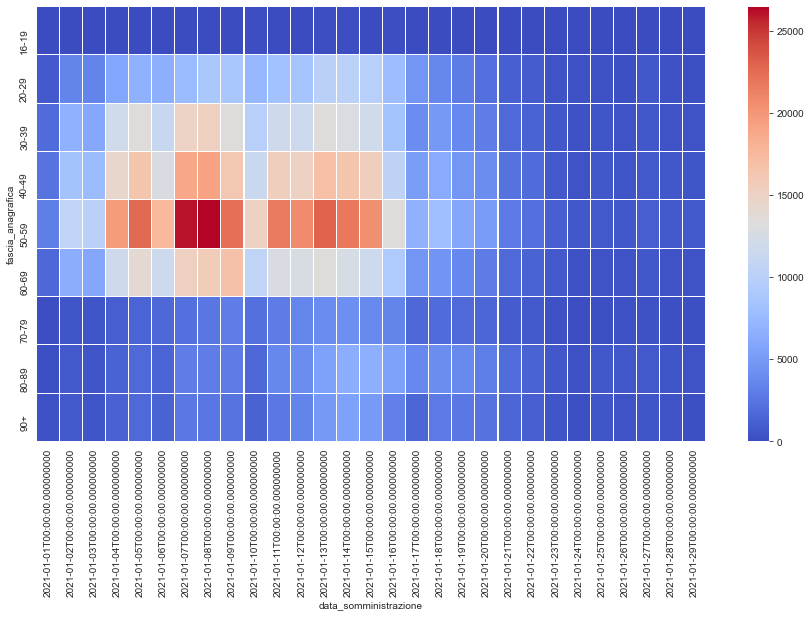

In [756]:

plt.figure(figsize=(15,8))
sns.heatmap(df_pivot, cmap='coolwarm', linecolor='white', linewidths=0.1)

In [757]:
daily = df.groupby('data_somministrazione')['prima_dose'].sum().reset_index()
df = df.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno'])

I need to groupby before calculating percentage as they are labelled by region as well

In [758]:
df1 = df.groupby(['data_somministrazione', 'fascia_anagrafica'])['prima_dose'].sum().reset_index(level=1).fillna(0)

In [759]:
df1 = df1.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno']).fillna(0)

In [760]:
df1['perc_tot_somministrati'] = (df1.prima_dose/df1.prima_dose_totale_giorno).mul(100).round(0)

In [761]:
df1.data_somministrazione = df1.data_somministrazione.dt.strftime("%d-%m-%Y")
df1_pivot = df1.pivot(columns='data_somministrazione',index='fascia_anagrafica',values='perc_tot_somministrati').sort_index(ascending=False)

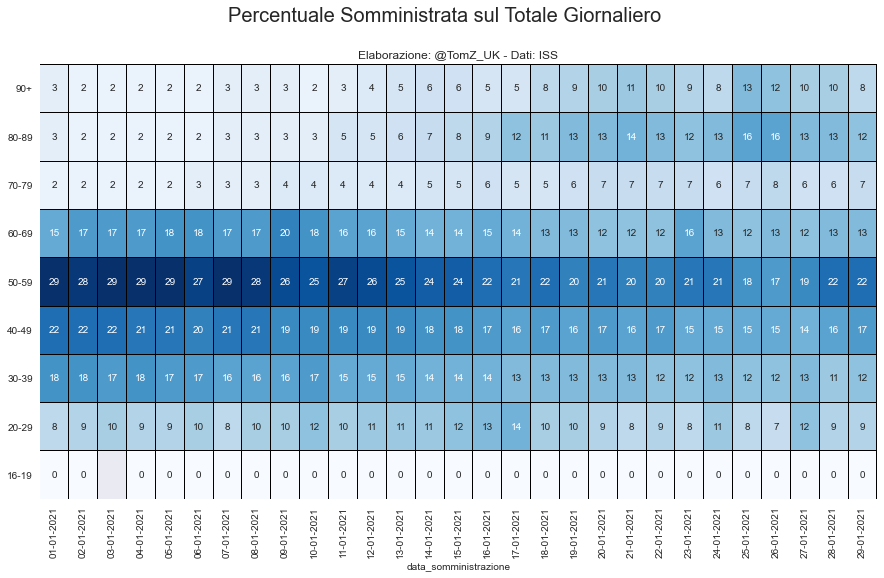

In [762]:
plt.figure(figsize=(15,8))
sns.heatmap(df1_pivot, cmap='Blues'
,annot=True, linecolor='black', linewidths=0.01, cbar=False, fmt='g')
plt.ylabel('')
plt.yticks(rotation=0, )
plt.suptitle('Percentuale Somministrata sul Totale Giornaliero', fontsize=20)
plt.title('Elaborazione: @TomZ_UK - Dati: ISS')

plt.savefig('percentuale_totale_HM.png')

# Analisi Popolazione
Percentuale somministrazioni sul totale popolazione divisa per gruppi anagrafici

In [763]:
pd.read_html('https://www.tuttitalia.it/statistiche/popolazione-eta-sesso-stato-civile-2020/')[0]


Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi  \
       Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi   
0      0-4     2.264.538           0          0            0   1.163.19851,4%   
1      5-9     2.627.956           0          0            0   1.352.24051,5%   
2    10-14     2.835.060           0          0            0   1.460.44951,5%   
3    15-19     2.868.948       2.004         21           83   1.485.46551,7%   
4    20-24     2.890.840      64.253        127          668   1.549.02052,4%   
5    25-29     2.714.681     407.555        630        5.628   1.605.44451,3%   
6    30-34     2.084.313   1.169.221      2.418       26.489   1.658.74950,5%   
7    35-39     1.577.289   1.915.487      7.282       72.133   1.792.98150,2%   
8    40-44     1.393.337   2.620.552     18.957      154.618   2.089.19849,9%   
9    45-49     1.211.484   3.236.400     42.592      259.289   2.356.80049,6%   
10   50-54       914.381   3.545.692     84.717      331.914   2.404.14449,3%   
11   55-59       626.453   3.439.662    147.926      323.450   2.213.00848,8%   
12   60-64       411.731   3.006.985    230.387      244.247   1.874.92248,2%   
13   65-69       286.807   2.663.542    348.074      172.591   1.652.74047,6%   
14   70-74       225.584   2.429.874    544.701      124.201   1.555.30646,8%   
15   75-79       170.300   1.701.425    701.606       70.682   1.181.23344,7%   
16   80-84       140.403   1.162.123    888.727       40.283     930.78741,7%   
17   85-89        93.445     500.696    785.500       16.983     507.80936,4%   
18   90-94        46.534     129.439    434.772        5.615     179.13029,1%   
19   95-99        13.552      16.437    129.152        1.238      35.14121,9%   
20    100+         1.556         836     12.307          105       2.33215,8%   
21  Totale    25.399.192  28.012.183  4.379.896    1.850.217  29.050.09648,7%   

            Femmine             Totale          
            Femmine Unnamed: 7_level_1       %  
0    1.101.34048,6%          2.264.538    3,8%  
1    1.275.71648,5%          2.627.956    4,4%  
2    1.374.61148,5%          2.835.060    4,8%  
3    1.385.59148,3%          2.871.056    4,8%  
4    1.406.86847,6%          2.955.888    5,0%  
5    1.523.05048,7%          3.128.494    5,2%  
6    1.623.69249,5%          3.282.441    5,5%  
7    1.779.21049,8%          3.572.191    6,0%  
8    2.098.26650,1%          4.187.464    7,0%  
9    2.392.96550,4%          4.749.765    8,0%  
10   2.472.56050,7%          4.876.704    8,2%  
11   2.324.48351,2%          4.537.491    7,6%  
12   2.018.42851,8%          3.893.350    6,5%  
13   1.818.27452,4%          3.471.014    5,8%  
14   1.769.05453,2%          3.324.360    5,6%  
15   1.462.78055,3%          2.644.013    4,4%  
16   1.300.74958,3%          2.231.536    3,7%  
17     888.81563,6%          1.396.624    2,3%  
18     437.23070,9%            616.360    1,0%  
19     125.23878,1%            160.379    0,3%  
20      12.47284,2%             14.804    0,0%  
21  30.591.39251,3%         59.641.488  100,0%

In [764]:
pop = pd.read_html('https://it.wikipedia.org/wiki/Demografia_d%27Italia', thousands='.')[11]
pop = pop[['Età', 'Totale']]
pop.drop(index=101, axis=0, inplace=True)
pop.Totale = pd.to_numeric(pop.Totale)
pop.tail()

,Età,Totale
96,96 anni,30447
97,97 anni,22450
98,98 anni,15624
99,99 anni,10192
100,100 anni e più,15080


In [765]:
pop['Età'] = pd.to_numeric(pop['Età'].str.split(' ', expand=True)[0])

In [766]:
def ages(s):
    if (s['Età'] >= 0 and s['Età'] < 16):
        return '0-16'
    elif (s['Età'] >= 16 and s['Età'] <= 19):
        return '16-19'
    elif (s['Età'] >= 20 and s['Età'] <= 29):
        return '20-29'
    elif (s['Età'] >= 30 and s['Età'] <= 39):
        return '30-39'
    elif (s['Età'] >= 40 and s['Età'] <= 49):
        return '40-49'
    elif (s['Età'] >= 50 and s['Età'] <= 59):
        return '50-59'
    elif (s['Età'] >= 60 and s['Età'] <= 69):
        return '60-69'
    elif (s['Età'] >= 70 and s['Età'] <= 79):
        return '70-79'
    elif (s['Età'] >= 80 and s['Età'] <= 89):
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

def regrouping(s):
    if s['Età'] >= 0 | s['Età'] < 16:
        return '0-16'
    elif s['Età'] >= 16 | s['Età'] <= 19:
        return '16-19'
    elif s['Età'] >= 20 | s['Età'] <= 29:
        return '20-29'
    elif s['Età'] >= 30 | s['Età'] <= 39:
        return '30-39'
    elif s['Età'] >= 40 | s['Età'] <= 49:
        return '40-49'
    elif s['Età'] >= 50 | s['Età'] <= 59:
        return '50-59'
    elif s['Età'] >= 60 | s['Età'] <= 69:
        return '60-69'
    elif s['Età'] >= 70 | s['Età'] <= 79:
        return '70-79'
    elif s['Età'] >= 80 | s['Età'] <= 89:
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

In [767]:

pop['gruppo'] = pop.apply(ages, axis=1)

In [768]:
pop

,Età,Totale,gruppo
0,0,532991,0-16
1,1,542019,0-16
2,2,553729,0-16
3,3,561994,0-16
4,4,559203,0-16
...,...,...,...
96,96,30447,90+
97,97,22450,90+
98,98,15624,90+
99,99,10192,90+


In [769]:
pop = pop.groupby('gruppo')['Totale'].sum().reset_index()
pop.gruppo = pop.gruppo.astype(str)

In [770]:
pop

,gruppo,Totale
0,0-16,8885150
1,16-19,2310358
2,20-29,6327883
3,30-39,8345554
4,40-49,9567872
5,50-59,7871829
6,60-69,6860158
7,70-79,5628974
8,80-89,3117811
9,90+,518155


In [771]:
df1 = df1.merge(pop, left_on='fascia_anagrafica', right_on='gruppo', how='inner')
df1.drop('gruppo', axis=1, inplace=True)
df1.rename(columns={'Totale':'totale_fascia'}, inplace=True)
df1.head()

,data_somministrazione,fascia_anagrafica,prima_dose,prima_dose_totale_giorno,perc_tot_somministrati,totale_fascia
0,01-01-2021,16-19,2,10911,0.0,2310358
1,02-01-2021,16-19,18,37872,0.0,2310358
2,04-01-2021,16-19,12,67575,0.0,2310358
3,05-01-2021,16-19,22,78600,0.0,2310358
4,06-01-2021,16-19,38,64582,0.0,2310358


In [772]:
df2 = (df1.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose']
 .sum().groupby(level=0).cumsum().reset_index()
.merge(pop, left_on='fascia_anagrafica', right_on='gruppo')).drop(['gruppo'], axis=1)
df2.tail()

,data_somministrazione,fascia_anagrafica,prima_dose,Totale
255,25-01-2021,90+,4424,518155
256,26-01-2021,90+,3948,518155
257,27-01-2021,90+,5558,518155
258,28-01-2021,90+,4058,518155
259,29-01-2021,90+,3506,518155


In [773]:
df_last = df1.groupby('fascia_anagrafica')[['prima_dose','totale_fascia']].agg({'prima_dose':'sum','totale_fascia':'last'}).reset_index()

In [774]:
df_last['perc_vaccinata'] = (df_last.prima_dose/df_last.totale_fascia).mul(100).round(2)

In [775]:
df_last

,fascia_anagrafica,prima_dose,totale_fascia,perc_vaccinata
0,16-19,1318,2310358,0.06
1,20-29,132799,6327883,2.10
2,30-39,197831,8345554,2.37
3,40-49,246785,9567872,2.58
4,50-59,332007,7871829,4.22
5,60-69,205484,6860158,3.00
6,70-79,48906,5628974,0.87
7,80-89,71143,3117811,2.28
8,90+,55379,518155,10.69


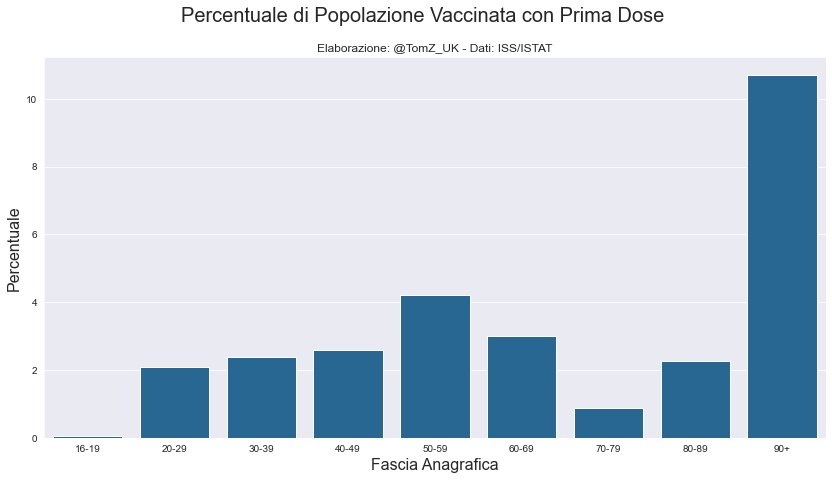

In [776]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,7))
sns.barplot(data=df_last, x='fascia_anagrafica',y='perc_vaccinata', color='#176AA5').set_title('Elaborazione: @TomZ_UK - Dati: ISS/ISTAT', fontsize=12)
plt.ylabel('Percentuale', fontsize=16)
plt.xlabel('Fascia Anagrafica', fontsize=16)
plt.suptitle('Percentuale di Popolazione Vaccinata con Prima Dose', fontsize=20)

plt.savefig('Percentuale_Pop.png')

In [777]:
(df.prima_dose.sum() + df.seconda_dose.sum())

1774490

In [778]:
pop.drop(index=0, inplace=True)

In [779]:
((df.prima_dose.sum()/pop.Totale.sum())*100).round(2)

2.56

# Gauge Chart

In [780]:
df_seconda = df.groupby(df.data_somministrazione)[['seconda_dose']].sum().cumsum().reset_index()
df_seconda.seconda_dose.diff()

0         NaN
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        7.0
16     2798.0
17     4392.0
18     1772.0
19     4472.0
20    19328.0
21    13829.0
22    32513.0
23    30502.0
24    63147.0
25    74285.0
26    63298.0
27    86694.0
28    85801.0
Name: seconda_dose, dtype: float64

df.groupby(['data_somministrazione'])['prima_dose'].sum() \
  .groupby(level=1).cumsum().reset_index()

In [781]:
df_prima = df.groupby('data_somministrazione')[['prima_dose']].sum().cumsum().reset_index()

In [782]:
pop.Totale.sum()

50548594

In [783]:
df_prima['pct_pop_prima_dose'] = (df_prima.prima_dose/pop.Totale.sum()).mul(100)

In [784]:
df_prima['daily_change'] = df_prima.pct_pop_prima_dose.diff()

In [785]:
df_prima['prima_dose_giorno'] = df_prima.prima_dose.diff().fillna(0)

In [786]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = float(df_prima.pct_pop_prima_dose.tail(1).round(1)),
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Percentuale Popolazione 16+ Vaccinata con Prima Dose", 'font': {'size': 24}},
    delta = {'reference': float(df_prima.pct_pop_prima_dose.iloc[-7]), 'increasing': {'color': "Green"},
            'valueformat':'.02f'},
    gauge = {
        'axis': {'range': [None, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "#FFBF00"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 80], 'color': '#85C1E9'},
            {'range': [40, 60], 'color': '#85C1E9'},
            {'range': [60, 80], 'color': '#85C1E9'}],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 80}}))

fig.update_layout(paper_bgcolor = "lavender", font = {'color': "darkblue", 'family': "Arial"})

fig

In [787]:
df_prima['seconda_dose_giorno'] = df_seconda.seconda_dose.diff().fillna(0)
df_prima

,data_somministrazione,prima_dose,pct_pop_prima_dose,daily_change,prima_dose_giorno,seconda_dose_giorno
0,2021-01-01,10911,0.021585,NaN,0.0,0.0
1,2021-01-02,48783,0.096507,0.074922,37872.0,0.0
2,2021-01-03,83601,0.165387,0.068880,34818.0,0.0
3,2021-01-04,151176,0.299071,0.133683,67575.0,0.0
4,2021-01-05,229776,0.454565,0.155494,78600.0,0.0
5,2021-01-06,294358,0.582327,0.127762,64582.0,0.0
6,2021-01-07,385152,0.761944,0.179617,90794.0,0.0
7,2021-01-08,479200,0.947999,0.186055,94048.0,0.0
8,2021-01-09,565071,1.117877,0.169878,85871.0,0.0
9,2021-01-10,624819,1.236076,0.118199,59748.0,0.0


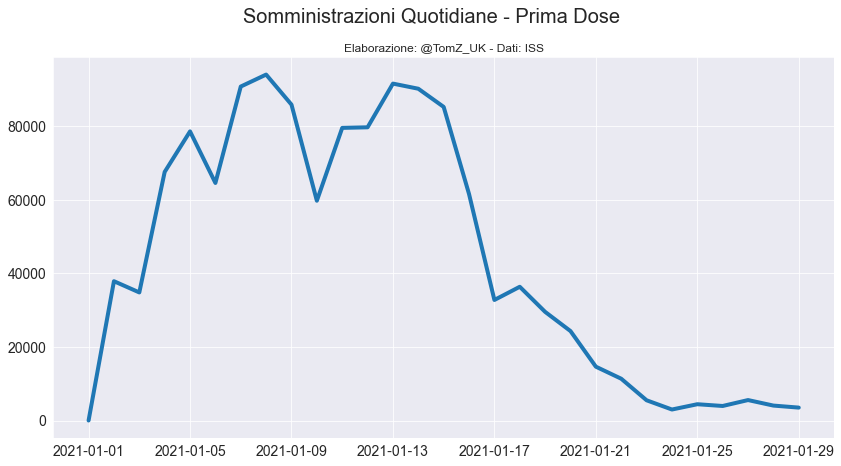

In [788]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_prima, x='data_somministrazione', y='prima_dose_giorno', 
             linewidth=4).set_title('Elaborazione: @TomZ_UK - Dati: ISS')
plt.suptitle('Somministrazioni Quotidiane - Prima Dose', fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.ylabel('')
plt.yticks(fontsize=14)

plt.savefig('daily_first_doses.png')

In [789]:
df_pl = df_prima[['data_somministrazione','prima_dose_giorno','seconda_dose_giorno']]
df_pl.rename(columns={'prima_dose_giorno':'Prima Dose', 'seconda_dose_giorno':'Seconda Dose'}, inplace=True)
df_pl

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,data_somministrazione,Prima Dose,Seconda Dose
0,2021-01-01,0.0,0.0
1,2021-01-02,37872.0,0.0
2,2021-01-03,34818.0,0.0
3,2021-01-04,67575.0,0.0
4,2021-01-05,78600.0,0.0
5,2021-01-06,64582.0,0.0
6,2021-01-07,90794.0,0.0
7,2021-01-08,94048.0,0.0
8,2021-01-09,85871.0,0.0
9,2021-01-10,59748.0,0.0


In [790]:
df_pl = df_pl.melt(id_vars=['data_somministrazione'])


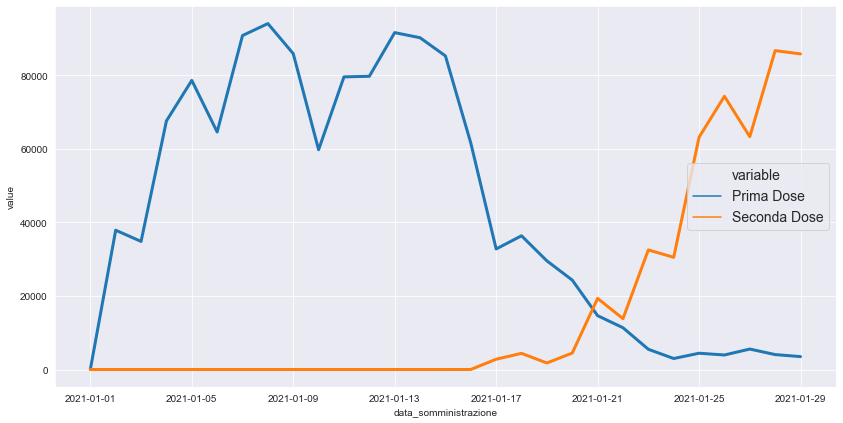

In [794]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_pl, x='data_somministrazione',y='value',hue='variable',
            linewidth=3)
plt.legend(fontsize=14)

